## 데이터 분석 맛보기 (직장인을 위한 데이터 분석 실무 파이썬 공부)
## 1. selenium 활용한 crawling, 여러 음원 서비스의 순위 수집/정리(멜론,벅스,지니)

In [7]:
#1. 멜론 크롤링 결과를 엑셀 파일로 저장하기
from selenium import webdriver
from bs4 import BeautifulSoup

In [8]:
driver = webdriver.Chrome('c:/chromedriver.exe')
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [9]:
song_data = []
rank = 1
songs = soup.select('table > tbody > tr')
for song in songs:
    title = song.select('div.rank01 > span > a')[0].text
    singer = song.select('div.rank02 > a')[0].text
    song_data.append(['Melon', rank, title, singer])
    rank = rank + 1

In [10]:
import pandas as pd
columns = ['서비스', '순위', '타이틀', '가수']
pd_data = pd. DataFrame(song_data, columns = columns)
pd_data.head()

,서비스,순위,타이틀,가수
0,Melon,1,롤린 (Rollin'),브레이브걸스
1,Melon,2,라일락,아이유
2,Melon,3,Peaches (Feat. Daniel Caesar & Giveon),Justin Bieber
3,Melon,4,Celebrity,아이유
4,Melon,5,운전만해 (We Ride),브레이브걸스


In [11]:
pd_data.to_excel('./files/melon.xlsx', index=False)

In [12]:
#2. 벅스 크롤링 결과를 엑셀 파일로 저장하기
driver = webdriver.Chrome('c:/chromedriver.exe')
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [13]:
song = soup.select('tr')
print(len(songs))

100


In [14]:
print(songs[0])

<tr data-song-no="30287019">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="롤린 (Rollin') 곡 선택" type="checkbox" value="30287019"/></div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10043575');" title="Rollin'">
<img alt="Rollin' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/100/43/575/10043575_20210302112520_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('30287019');" title="롤린 (Rollin') 곡정보"><span class="none">곡정보</span></a>
</div></td>
<td><div class="wrap">
<div class="wrap_song_info">
<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',30287019);" title="롤린 (Rollin') 재생">롤린 (Rollin')</a>
</span></div>
<br/>
<div class="elli

In [34]:
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    print(title, singer, sep = '|')

You make Me|DAY6 (데이식스)
Timeless|SG워너비
INSIDE OUT|뉴이스트
Healer|DAY6 (데이식스)
라일락|아이유(IU)
everyday we fight|DAY6 (데이식스)
Peaches (feat. Daniel Caesar, Giveon)|Justin Bieber(저스틴 비버)
둘도 아닌 하나|DAY6 (데이식스)
구름 위에서|DAY6 (데이식스)
라라라|SG워너비
롤린 (Rollin')|브레이브걸스(Brave Girls)
우리 앞으로 더 사랑하자|DAY6 (데이식스)
무적 (ONE)|DAY6 (데이식스)
운전만해 (We Ride)|브레이브걸스(Brave Girls)
그냥 안아달란 말야|다비치
Celebrity|아이유(IU)
내사람: Partner For Life|SG워너비
Coin|아이유(IU)
살다가|SG워너비
ASAP|STAYC(스테이씨)
고마워 (Thank you)|Apink (에이핑크)
죄와 벌|SG워너비
Kiss Me More (feat. SZA)|Doja Cat(도자 캣)
안녕이란 (Two Letters)|황치열
On The Ground|로제(ROSÉ)
어푸 (Ah puh)|아이유(IU)
Atlantis|SHINee (샤이니)
water color|휘인(Whee In)
BLACK|뉴이스트
Leave The Door Open|Bruno Mars(브루노 마스)
내 손을 잡아|아이유(IU)
EARPHONE (MINHYUN SOLO)|뉴이스트
DRIVE|뉴이스트
Beautiful Mistakes|Maroon 5(마룬 파이브)
DRESS|뉴이스트
DON'T WANNA GO|뉴이스트
Flu|아이유(IU)
LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)|양요섭
돌림노래 (Feat. DEAN)|아이유(IU)
Dynamite|방탄소년단
아이와 나의 바다|아이유(IU)
Like 1999|Valley
Daisy (Feat. pH-1)|미란이
문턱|권진아
봄 안녕 봄|아이유(IU)
에필로그|아이유(IU)
밤편지|아

In [36]:
song_data = []
rank = 1
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text
    singer = song.select('p.artist > a')[0].text
    song_data.append(['Bugs', rank, title, singer])
    rank = rank + 1

In [37]:
import pandas as pd
columns = ['서비스', '순위', '타이틀', '가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     100 non-null    object
 1   순위      100 non-null    int64 
 2   타이틀     100 non-null    object
 3   가수      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [39]:
pd_data.to_excel('./files/bugs.xlsx', index=False)

In [41]:
#지니 크롤링 결과를 엑셀 파일로 저장하기
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

driver = webdriver.Chrome('c:/chromedriver.exe')
url = 'https://www.genie.co.kr/chart/top200'
driver.get(url)

In [42]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [43]:
song = soup.select('table > tbody > tr')
print(len(songs))

100


In [44]:
print(songs[0])

<tr albumid="20391201" artistid="80245739" multiartist="N" mvid="592983" rowtype="track" trackid="32209764">
<input name="_isStream" type="hidden" value="32209764"/>
<input name="_isDown" type="hidden" value="32209764"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="You make Me" type="checkbox" value="32209764"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change up"><span class="arrow"></span> <em>1</em> <span>계단 상승</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/20391201?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="The Book of Us : Negentropy - Chaos swallowed up in love 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/203912/20391201.jpg?version=20210419180018.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/32209764?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N"

In [45]:
song = songs[0]

In [46]:
title = song.select('a.title')
len(title)

0

In [48]:
songs = soup.select('tbody > tr')
for song in songs:
    title = song.select('a.title')[0].text.strip()
    signer = song.select('a.artist')[0].text
    print(title, singer, sep = '|')

Timeless|CHEEZE(치즈)
롤린 (Rollin')|CHEEZE(치즈)
라일락|CHEEZE(치즈)
Peaches (Feat. Daniel Caesar & Giveon)|CHEEZE(치즈)
운전만해 (We Ride)|CHEEZE(치즈)
INSIDE OUT|CHEEZE(치즈)
You make Me|CHEEZE(치즈)
라라라|CHEEZE(치즈)
Celebrity|CHEEZE(치즈)
그냥 안아달란 말야|CHEEZE(치즈)
내사람 : Partner For Life|CHEEZE(치즈)
Coin|CHEEZE(치즈)
살다가|CHEEZE(치즈)
LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)|CHEEZE(치즈)
Antidote|CHEEZE(치즈)
Dynamite|CHEEZE(치즈)
내 손을 잡아|CHEEZE(치즈)
On The Ground|CHEEZE(치즈)
At My Worst|CHEEZE(치즈)
이제 나만 믿어요|CHEEZE(치즈)
죄와 벌 (罪와 罰)|CHEEZE(치즈)
Healer|CHEEZE(치즈)
everyday we fight|CHEEZE(치즈)
둘도 아닌 하나|CHEEZE(치즈)
어푸 (Ah puh)|CHEEZE(치즈)
구름 위에서|CHEEZE(치즈)
NEED IT (BAEKHO SOLO)|CHEEZE(치즈)
봄 안녕 봄|CHEEZE(치즈)
별빛 같은 나의 사랑아|CHEEZE(치즈)
HERO|CHEEZE(치즈)
밝게 빛나는 별이 되어 비춰줄게|CHEEZE(치즈)
밤하늘의 별을 (2020)|CHEEZE(치즈)
Atlantis|CHEEZE(치즈)
Flu|CHEEZE(치즈)
우리 앞으로 더 사랑하자|CHEEZE(치즈)
무적 (ONE)|CHEEZE(치즈)
12 : 45 (Stripped)|CHEEZE(치즈)
에잇 (Prod. & Feat. SUGA of BTS)|CHEEZE(치즈)
Blueming|CHEEZE(치즈)
BLACK|CHEEZE(치즈)
DON'T WANNA GO|CHEEZE(치즈)
DRESS|CHEEZE(치즈)
VVS (Feat. 

In [49]:
song_data = []
rank = 1
songs = soup.select('tbody > tr')
for song in songs:
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text
    song_data.append(['Genie', rank, title, singer])
    rank = rank + 1

In [50]:
import pandas as pd
columns = ['서비스', '순위', '타이틀', '가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.to_excel('./files/genie.xlsx', index=False)

In [51]:
import pandas as pd
excel_names = ['./files/melon.xlsx', './files/bugs.xlsx', './files/genie.xlsx']
appended_data = pd.DataFrame()
for name in excel_names:
    pd_data = pd.read_excel(name)
    appended_data = appended_data.append(pd_data)

In [52]:
appended_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int64 
 2   타이틀     250 non-null    object
 3   가수      250 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [53]:
appended_data.to_excel('./files/total.xlsx', index=False)

## 2. YouTube 랭킹 데이터 수집과 시각화

In [54]:
#https://youtube-rank.com/board/bbs/board.php?bo_table=youtube (랭킹 보는 사이트)
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [55]:
browser = webdriver.Chrome('c:/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
browser.get(url)

In [56]:
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [57]:
channel_list = soup.select('tr')
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [59]:
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [60]:
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AAUvwnheBe2kEkBDitMl_iIGaTiiP4PeG6pO562vu9ch7g=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AAUvwnheBe2kEkBDitMl_iIGaTiiP4PeG6pO562vu9ch7g=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [61]:
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [62]:
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [63]:
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

6020만
171억3445만
355개


In [65]:
channel_list = soup.select('tbody > tr')
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 6020만 171억3445만 355개
HYBE LABELS [음악/댄스/가수] 5360만 157억0310만 583개
BANGTANTV [음악/댄스/가수] 4820만 95억8031만 1,468개
TheEllenShow [미분류] 3780만 215억2282만 12,911개
SMTOWN [음악/댄스/가수] 2690만 204억1479만 3,683개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2370만 64억0369만 2,553개
1theK (원더케이) [음악/댄스/가수] 2240만 195억4773만 14,332개
JYP Entertainment [음악/댄스/가수] 2030만 124억7946만 1,245개
Mnet K-POP [음악/댄스/가수] 1760만 118억5348만 23,447개
JFlaMusic [음악/댄스/가수] 1700만 33억2210만 277개
KBS WORLD TV [TV/방송] 1600만 116억3993만 50,504개
officialpsy [음악/댄스/가수] 1480만 84억0761만 90개
BIGBANG [음악/댄스/가수] 1350만 64억9215만 773개
Jane ASMR 제인 [음식/요리/레시피] 1300만 42억3598만 1,069개
Nao FunFun [키즈/어린이] 1090만 496만 37개
TWICE [음악/댄스/가수] 1040만 17억9256만 527개
Stone Music Entertainment [음악/댄스/가수] 967만 73억8946만 7,399개
DuDuPopTOY [키즈/어린이] 954만 42억0472만 1,628개
MBCkpop [TV/방송] 925만 70억1654만 39,867개
핑크퐁 (인기 동요・동화) [키즈/어린이] 912만 54억4406만 2,114개
Larva TUBA [키즈/어린이] 904만 38억7933만 2,490개
서은이야기[SeoeunStory] 

IndexError: list index out of range

In [69]:
page = 1
url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [70]:
results = []
for page in range(1, 11):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

In [71]:
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index = False)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

In [5]:
df = pd.read_excel('./files/youtube_rank.xlsx')
df.head()

,title,category,subscriber,view,video
0,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tBLACKPINK\...,[음악/댄스/가수],6020만,171억3445만,355개
1,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tHYBE LABEL...,[음악/댄스/가수],5360만,157억0310만,583개
2,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tBANGTANTV\...,[음악/댄스/가수],4820만,95억8031만,"1,468개"
3,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tTheEllenSh...,[미분류],3780만,215억2282만,"12,911개"
4,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tSMTOWN\t\t...,[음악/댄스/가수],2690만,204억1479만,"3,683개"


In [6]:
df.tail()

,title,category,subscriber,view,video
995,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tToday on t...,[게임],47만,5205만,633개
996,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t썩쏘TV\t\t\t...,[게임],47만,3억0087만,"1,947개"
997,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t상해기SangHyu...,[BJ/인물/연예인],47만,1억0037만,261개
998,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tMediaVOP\t...,[뉴스/정치/사회],47만,6억3032만,"16,495개"
999,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t이수근 채널\t\t...,[스포츠/운동],47만,5780만,242개


In [7]:
df['subscriber'][0:10]

0    6020만
1    5360만
2    4820만
3    3780만
4    2690만
5    2650만
6    2370만
7    2240만
8    2030만
9    1760만
Name: subscriber, dtype: object

In [8]:
df['subscriber'].str.replace('만', '0000')[0:10]

0    60200000
1    53600000
2    48200000
3    37800000
4    26900000
5    26500000
6    23700000
7    22400000
8    20300000
9    17600000
Name: subscriber, dtype: object

In [9]:
df['replaced_subscriber'] = df['subscriber'].str.replace('만', '0000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tBLACKPINK\...,[음악/댄스/가수],6020만,171억3445만,355개,60200000
1,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tHYBE LABEL...,[음악/댄스/가수],5360만,157억0310만,583개,53600000
2,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tBANGTANTV\...,[음악/댄스/가수],4820만,95억8031만,"1,468개",48200000
3,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tTheEllenSh...,[미분류],3780만,215억2282만,"12,911개",37800000
4,\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\tSMTOWN\t\t...,[음악/댄스/가수],2690만,204억1479만,"3,683개",26900000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [10]:
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 43.1+ KB


In [11]:
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber', aggfunc = ['sum', 'count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],95760000,72
[IT/기술/컴퓨터],7460000,8
[TV/방송],219960000,149
[게임],70730000,85
[교육/강의],21550000,21


In [12]:
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],95760000,72
[IT/기술/컴퓨터],7460000,8
[TV/방송],219960000,149
[게임],70730000,85
[교육/강의],21550000,21


In [13]:
pivot_df = pivot_df.reset_index() #각 칼럼은 데이터프레임에서 인덱스로 설정되어 reset_index()를 이용해 인덱스 초기화
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],95760000,72
1,[IT/기술/컴퓨터],7460000,8
2,[TV/방송],219960000,149
3,[게임],70730000,85
4,[교육/강의],21550000,21


In [14]:
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False) #sort_values()으로 정렬 왜냐하면 오름차순이 
#기본 설정으로 되어 있어 내림차순시 ascending=False를 인자로 입력해야함.
pivot_df.head()

,category,subscriber_sum,category_count
12,[음악/댄스/가수],629590000,174
17,[키즈/어린이],251660000,90
2,[TV/방송],219960000,149
11,[음식/요리/레시피],164380000,83
0,[BJ/인물/연예인],95760000,72


In [20]:
%matplotlib inline

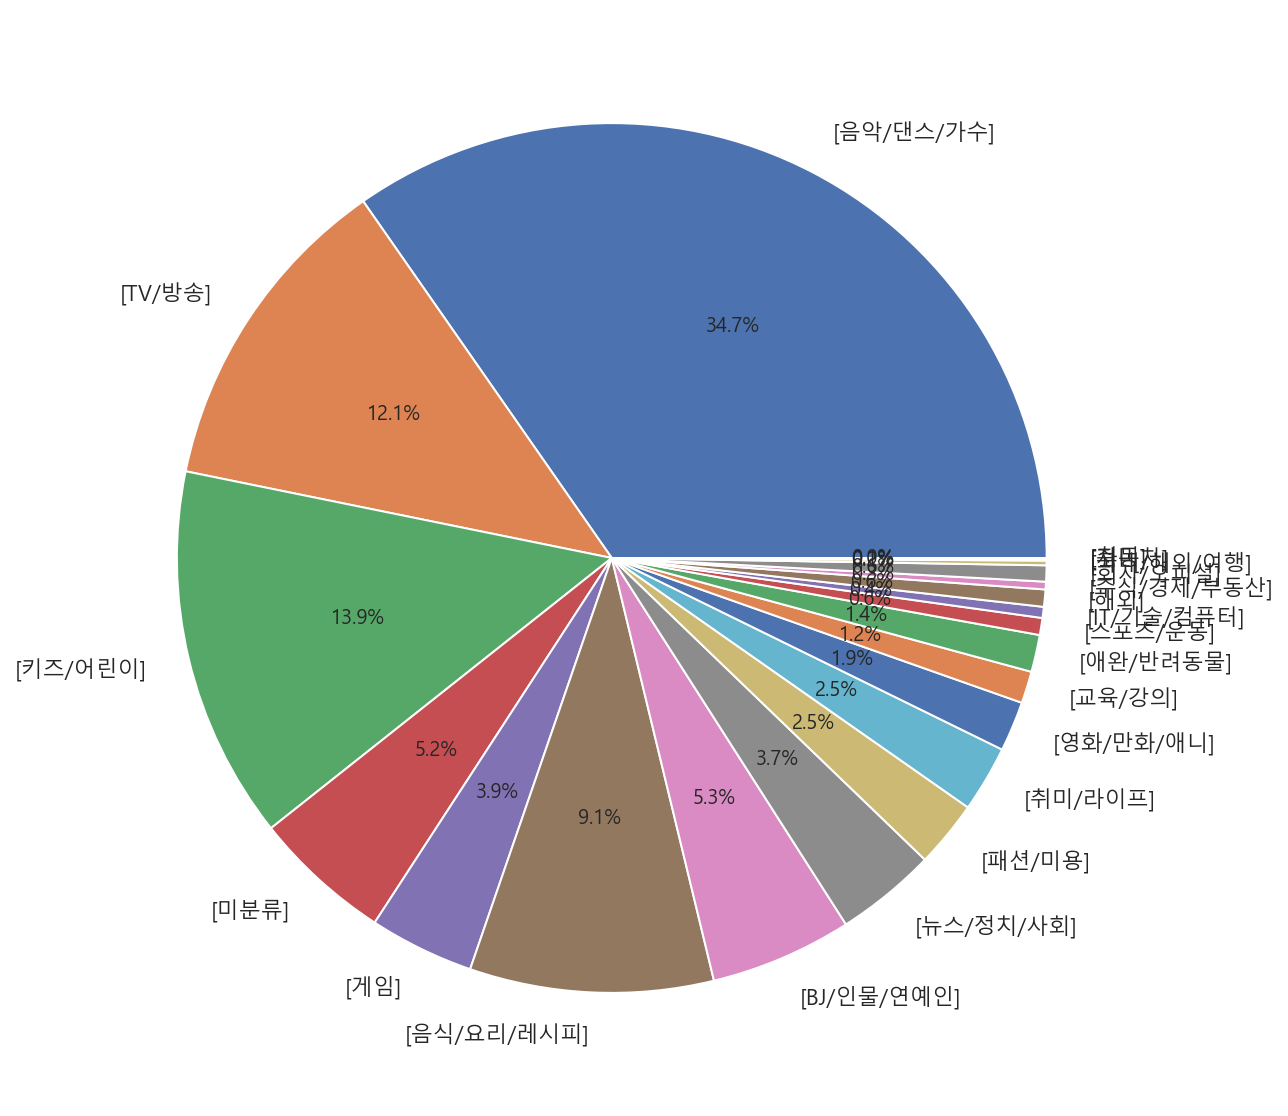

In [21]:
plt.figure(figsize = (30, 10)) #각 축 사이즈 설정
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


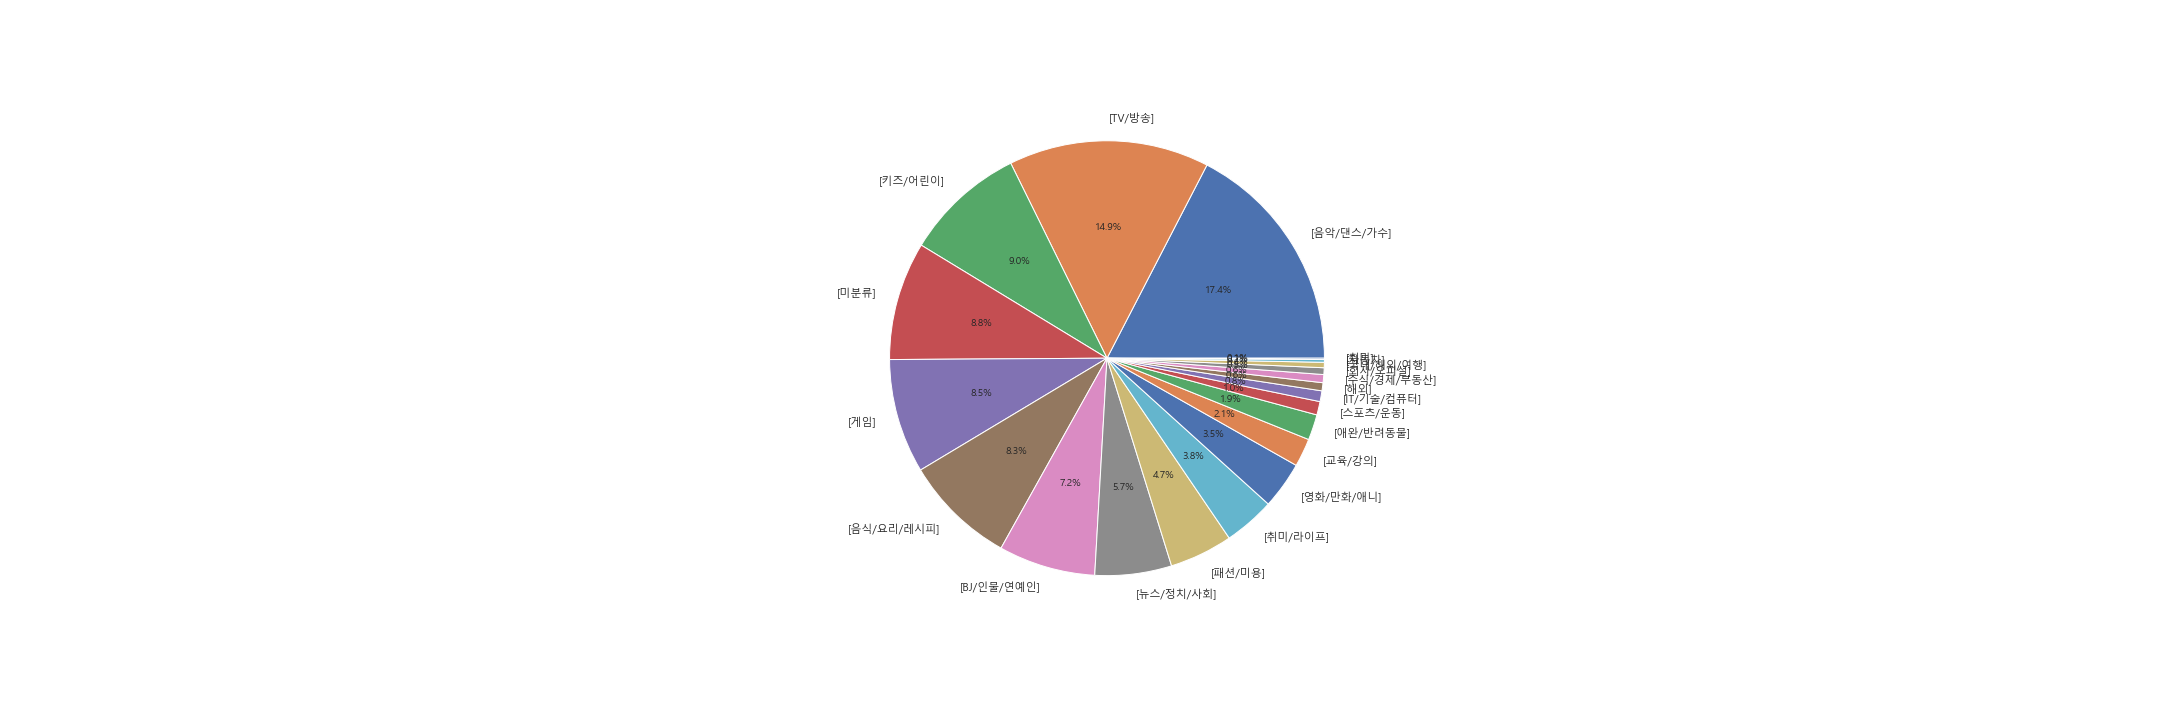

In [24]:
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize = (30, 10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()